# Appendix A:  Confidence and prediction intervals for univariate 0D data

This appendix describes how to construct and numerically validate [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) (CIs) and [prediction intervals](https://en.wikipedia.org/wiki/Prediction_interval) (PIs) for [univariate](https://en.wikipedia.org/wiki/Univariate) 0D data. "Univariate" implies a scalar quantity and "0D" implies a zero-dimensional, stationary process (i.e, a quantity that does not change over some domain like time). Below and throughout this Supplementary Material a Type I error rate ($\alpha$=0.05) is used, implying 95% CIs and PIs.


<p style="text-align: center;"><b>Glossary</b></p>

<table align="center">
  <tr>
    <th style="text-align:center">Symbol</th>
    <th style="text-align:center">Description</th>
    <th style="text-align:center">Comment</th>
  </tr>
  <tr>
    <td style="text-align:center">$\alpha$</td>
    <td style="text-align:center">Type I error rate</td> 
    <td style="text-align:center">$\alpha=0.05$ by convention; univariate intervals use $\alpha$/2 for two-tailed inference</td>
  </tr>
  <tr>
    <td style="text-align:center">$\mu$</td>
    <td style="text-align:center">Population mean</td> 
    <td style="text-align:center">$\mu = 0 $ in all examples below </td>
  </tr>
  <tr>
    <td style="text-align:center">$\sigma$</td>
    <td style="text-align:center">Population standard deviation</td> 
    <td style="text-align:center">$\sigma=1$ in all examples below</td>
  </tr>
  <tr>
    <td style="text-align:center">$\nu$</td>
    <td style="text-align:center">Degrees of freedom</td> 
    <td style="text-align:center">For univariate data: $\nu=J-1$</td>
  </tr>
  <tr>
    <td style="text-align:center">$c$</td>
    <td style="text-align:center">Critical test statistic value</td> 
    <td style="text-align:center">From Student's t distribution</td>
  </tr>
  <tr>
    <td style="text-align:center">$\overline{y}$</td>
    <td style="text-align:center">Sample mean</td> 
    <td style="text-align:center"></td>
  </tr>
  <tr>
    <td style="text-align:center">$s$</td>
    <td style="text-align:center">Sample standard deviation</td> 
    <td style="text-align:center"></td>
  </tr>
  <tr>
    <td style="text-align:center">$\textit{J}$</td>
    <td style="text-align:center">Sample size</td> 
    <td style="text-align:center"></td>
  </tr>
</table>



___

### Confidence intervals (CIs)

A 100(1-$\alpha$)% [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) contains the true population mean with a probability of (1-$\alpha$), and is defined as:

CI $\equiv \overline{y} \pm \frac{cs}{\sqrt{J}}$

where $c$ is the $(1-\frac{\alpha}{2})$th percentile of the Student's t distribution with $\nu=(J-1)$ degrees of freedom.

To demonstrate the computation of a 95% CI, let's start with random data from the standard normal distribution (i.e., $\mu$=0, $\sigma$=1):

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


np.random.seed(32)     #seed the random number generator to replicate results
J = 8                  #sample size
y = np.random.randn(J) #Gaussian data (standard normal distribution)

ax = pyplot.axes()
ax.plot(y, [0]*J, 'bo', ms=8, zorder=1, label='Gaussian data ($\mu$=0)')
ax.axhline(0, color='0.7', ls='-', zorder=0)
ax.axvline(0, color='0.7', ls='-', zorder=0)
ax.legend()
pyplot.show()

<Figure size 640x480 with 1 Axes>

The `confidence_interval` function below implements the equation above. For convenience and subsequent use, plotting functions are also provided below.

Confidence interval: [0.16346608 1.28165372]


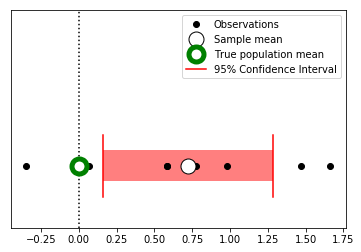

In [2]:
def confidence_interval(y, alpha=0.05):
    J     = y.size                     #sample size
    ybar  = y.mean()                   #sample mean
    s     = y.std(ddof=1)              #sample standard deviation
    df    = J - 1                      #degrees of freedom
    c     = stats.t.isf(alpha/2, df)   #critical test statistic
    w     = c * s / J**0.5             #interval width
    ci    = ybar-w, ybar+w             #confidence interval
    return np.array(ci)


def plot_data(ax, y, plot_sample_mean=True, population_mean=None):
    ax.plot(y, np.zeros(J), 'ko', label='Observations')
    if plot_sample_mean:
        ax.plot(y.mean(), 0, 'ko', label='Sample mean', ms=15, mfc='w')
    if population_mean is not None:
        mu = population_mean
        ax.plot(mu, 0, 'go', label='True population mean', ms=15, mfc='w', mew=5)
        ax.axvline(mu, color='k', ls=':', zorder=-1)

    
def plot_interval(y, interval, color='r', height=1, alpha=0.05, label='Confidence Interval'):
    h,hh     = height, 0.5 * height
    x        = interval
    ax.plot( [x[0]]*2, [-h, h], color=color, label='%d%s %s' %(100*(1-alpha),'%', label))
    ax.plot( [x[1]]*2, [-h, h], color=color)
    vertices = [(x[0],-hh), (x[1],-hh),    (x[1],hh), (x[0],hh)]
    patches  = PatchCollection([Polygon(vertices)])
    ax.add_collection(patches)
    pyplot.setp(patches, facecolor=color, alpha=0.5, linewidth=0)
    ax.set_ylim(-2, 5)
    ax.set_yticks([])
    

    
# compute 95% confidence interval:    
ci  = confidence_interval(y, alpha=0.05)
print('Confidence interval: %s' %ci)


# plot:
ax  = pyplot.axes()
plot_data(ax, y, plot_sample_mean=True, population_mean=0)
plot_interval(ax, ci)
ax.legend()
pyplot.show()

Note that a 95% CI is expected to contain the true population mean in 95% of a large number of experiments. In this case it does not contain the population mean, implying a [false positive](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_positive_error). This result is a false positive because one would incorrectly conclude that the sample mean is significantly different from the true population mean of $\mu$=0.

___

### Prediction intervals

A 100(1-$\alpha$)% [prediction interval](https://en.wikipedia.org/wiki/Prediction_interval) contains a new observation with a probability of $(1-\alpha)$, and is defined as:

PI $\equiv \overline{y} \pm cs \sqrt{1+(1/J)}$

Prediction interval: [-0.95472155  2.39984136]


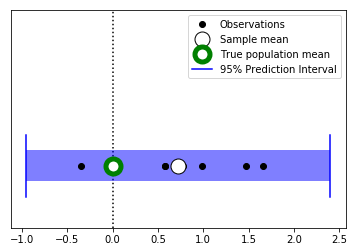

In [3]:
def prediction_interval(y, alpha=0.05):
    J     = y.shape[0]
    ybar  = y.mean()                   #sample mean
    s     = y.std(ddof=1)              #sample standard deviation
    df    = J - 1                      #degrees of freedom
    c     = stats.t.isf(alpha/2, df)   #critical test statistic
    w     = c * s * (1+(1/J))**0.5     #interval width
    pi    = ybar-w, ybar+w             #prediction interval
    return np.array(pi)

pi  = prediction_interval(y)


# compute 95% prediction interval:    
pi  = prediction_interval(y, alpha=0.05)
print('Prediction interval: %s' %pi)


# plot:
ax  = pyplot.axes()
plot_data(ax, y, plot_sample_mean=True, population_mean=0)
plot_interval(ax, pi, color='b', label='Prediction Interval')
ax.legend()
pyplot.show()

We could generate a new random observation, then check whether it lies in the PI:

In [4]:
yy    = float( np.random.randn(1) )
print(yy)

-0.2611771213271988


This observation lies within the PI, as expected. A false positive would have occurred had this new observation lay outside the PI. 

Last, let's visualize the CI and PI together:

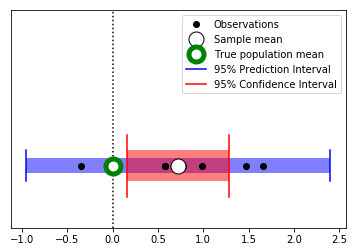

In [5]:
ax  = pyplot.axes()
plot_data(ax, y, plot_sample_mean=True, population_mean=0)
plot_interval(ax, pi, color='b', height=0.5, label='Prediction Interval')
plot_interval(ax, ci, color='r', height=1, label='Confidence Interval')
ax.legend()
pyplot.show()

___

### Numerically validating confidence and prediction intervals

CIs can be numerically validated by simulating a large number of datasets, constructing the 95% CI for each experiment, and then checking whether the true mean lies within the CI. 

In [6]:
np.random.seed(0)   #seed the random number generator to replicate results
J           = 10    #sample size
niterations = 2000  #number of datasets / experiments to simulate
in_ci       = []    #list that will hold one True or False value for each iteration
mu          = 0     #true population mean
alpha       = 0.05  #Type I error rate

for i in range(niterations):
    y       = mu + np.random.randn(J) #Gaussian data
    ci      = confidence_interval(y, alpha)
    in_ci.append( (mu>=ci[0]) and (mu<=ci[1])   )

    
prop_in     = np.mean( in_ci )  #proportion of experiments where the true mean lies inside the CI 
prop_out    = 1 - prop_in       #proportion of experiments where the true mean lies outside the CI 

print('Proportion of random datasets with mu inside CI: %.3f' %prop_in)
print('Proportion of random datasets with mu outside CI: %.3f' %prop_out)



Proportion of random datasets with mu inside CI: 0.944
Proportion of random datasets with mu outside CI: 0.056


The proprotion of random datasets with $\mu$ outside the CI are, as expected, close to $\alpha$. However, this proportion is not exactly $\alpha$ becaus $\alpha$ pertains to an infinite number of datasets, or `niterations` = $\infty$. Increasing `niterations` to a larger number, like 10,000 or 100,000 or 1,000,000, should cause closer convergence to $\alpha$.

This general procedure of simulating random datasets will be used throughout this supplementary material.

Let's repeat for prediction intervals:

In [7]:
np.random.seed(1)   #seed the random number generator to replicate results
J           = 8     #sample size
niterations = 2000  #number of datasets / experiments to simulate
in_pi       = []    #list that will hold one True or False value for each iteration
mu          = 0     #true population mean
alpha       = 0.05  #Type I error rate

for i in range(niterations):
    y       = mu + np.random.randn(J) #Gaussian data
    yy      = float(mu + np.random.randn(1)) #a new random observation
    pi      = prediction_interval(y, alpha)
    in_pi.append( (yy>=pi[0]) and (yy<=pi[1])   )

    
prop_in     = np.mean( in_pi )  #proportion of experiments where the true mean lies inside the PI 
prop_out    = 1 - prop_in       #proportion of experiments where the true mean lies outside the PI 

print('Proportion of random datasets with new observation inside PI: %.3f' %prop_in)
print('Proportion of random datasets with new observation outside PI: %.3f' %prop_out)

Proportion of random datasets with new observation inside PI: 0.951
Proportion of random datasets with new observation outside PI: 0.049


Like above the results converge to $\alpha$.

___

### Summary

This Appendix demonstrated the difference between CIs and PIs, how to calculate them, and how to numerically validate them using iterative, random dataset simulations. The key points are:

* A false positive occurs for a CI when the true population mean lies outside the CI
* A false positive occurs for a PI when a new, random observation lies outside the PI

and

* 95% CIs contain the true population mean with a probability of 0.95
* 95% PIs contain a new, random observation with a probability of 0.95
* 95% CIs and PIs both have false positive rates of $\alpha$=0.05


